<a href="https://colab.research.google.com/github/Aninda07/CVPR/blob/main/PA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anikaiub","key":"cde94e68e8e63cea3d1df4ef2ba0358f"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d grassknoted/asl-alphabet

100% 1.02G/1.03G [00:11<00:00, 101MB/s] 
100% 1.03G/1.03G [00:11<00:00, 96.0MB/s]


In [ ]:
! unzip asl-alphabet.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_tr

In [ ]:
import os
import cv2
import random
import pickle
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_dir = '/content/asl_alphabet_train/asl_alphabet_train'
test_dir = '/content/asl_alphabet_test/asl_alphabet_test'

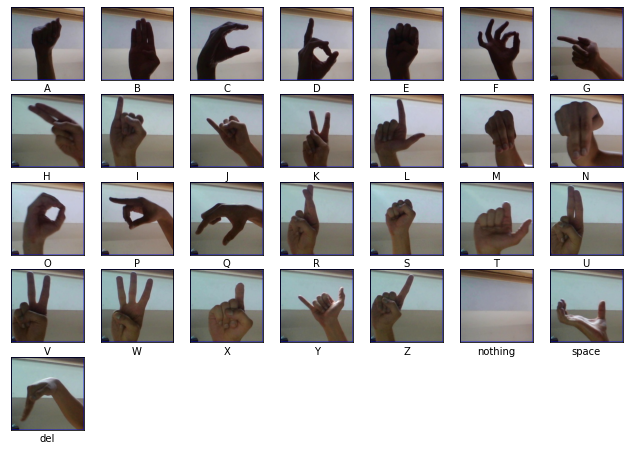

In [ ]:
categories = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K','L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'nothing', 'space', 'del']
plt.figure(figsize=(11, 11))
for i in range (0,29):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = train_dir + "/{0}/{0}1.jpg".format(categories[i])
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(categories[i])


In [ ]:
def load_data(train_dir):
    images = []
    labels = []
    size = 32,32
    index = -1
    for folder in os.listdir(train_dir):
        index +=1
        for image in os.listdir(train_dir + "/" + folder):
            temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            images.append(temp_img)
            labels.append(index)
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = utils.to_categorical(labels)
    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2)
    
    print('Train data =', x_train.shape)
    print('Test data =', x_test.shape)
    
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = load_data(train_dir)

Train data = (69600, 32, 32, 3)
Test data = (17400, 32, 32, 3)


In [ ]:
classes = 29
batch = 128
epochs = 5
learning_rate = 0.0001

def results(model):
  adam = Adam(lr=learning_rate)

  model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

  history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.1, shuffle = True, verbose=1)

  model.summary()

  plt.figure(figsize=(12, 12))
  plt.subplot(3, 2, 1)
  plt.plot(history.history['accuracy'], label = 'train-accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val-accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.subplot(3, 2, 2)
  plt.plot(history.history['loss'], label = 'train-loss')
  plt.plot(history.history['val_loss'], label = 'val-loss')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()


  test_loss, test_acc = model.evaluate(x_test, y_test)

  print('Tests accuracy:', test_acc)
  print('Tests loss:', test_loss)

58892288/58889256 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
490/490 [==============================] - 4183s 9s/step - loss: 1.7100 - accuracy: 0.4443 - val_loss: 0.4118 - val_accuracy: 0.8888
Epoch 2/5
490/490 [==============================] - 4147s 8s/step - loss: 0.2081 - accuracy: 0.9383 - val_loss: 0.1188 - val_accuracy: 0.9674
Epoch 3/5
490/490 [==============================] - 4334s 9s/step - loss: 0.0852 - accuracy: 0.9792 - val_loss: 0.0327 - val_accuracy: 0.9921
Epoch 4/5
490/490 [==============================] - 4253s 9s/step - loss: 0.0318 - accuracy: 0.9926 - val_loss: 0.0459 - val_accuracy: 0.9902
Epoch 5/5
490/490 [==============================] - 4326s 9s/step - loss: 0.0362 - accuracy: 0.9917 - val_loss: 0.0421 - val_accuracy: 0.9892
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
f

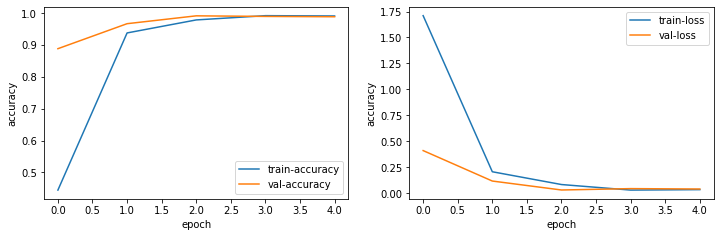

544/544 [==============================] - 103s 190ms/step - loss: 0.0431 - accuracy: 0.9882
Tests accuracy: 0.9881609082221985
Tests loss: 0.04310590773820877


In [ ]:
model = Sequential()

model.add(VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3)))

model.add(Flatten())

model.add(Dense(512, activation='sigmoid'))

model.add(Dense(1024, activation='sigmoid'))

model.add(Dense(2048, activation='sigmoid'))

model.add(Dense(4096, activation='sigmoid'))

model.add(Dense(29, activation='softmax'))

results(model)